In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
from gensim.models import Word2Vec
import numpy as np

WORK_DIR = '/content/drive/My Drive/FINA4350'
DATA_DIR = f'{WORK_DIR}/datasets/cashcowputer-dataset'

sentiment_df = pd.read_csv(f'{DATA_DIR}/preprocessed/revamped_preprocessed_tweet_senti_dataset.csv')
sentiment_df.dropna(axis=0,inplace=True)
sentiment_text = sentiment_df.cleaned_text.values
stock_tweets = pd.read_csv(f'{DATA_DIR}/preprocessed/tweets/all_indexed_stock_tweets.csv')
stock_tweets.drop_duplicates(keep='first',inplace=True)
stock_tweets_text = stock_tweets.cleaned_text.values

In [0]:
news = pd.read_csv(f'{DATA_DIR}/preprocessed/news/news.csv')
news.drop_duplicates(keep='first',inplace=True)
news['combined'] = news[['title','content']].apply(lambda x:' '.join(x.dropna()),axis=1)
news_text = news.combined.values
news.combined.isna().values.any()

False

In [0]:
final_text = np.append(np.append(sentiment_text,stock_tweets_text),news_text)
len(final_text)

1781375

In [0]:
word_tokenize(final_text[0])

['is', 'so', 'sad', 'for', 'my', 'apl', 'friend']

In [0]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
stopwords = stopwords.words('english')

In [0]:
final_text_tokens = list(map(lambda x: [i for i in word_tokenize(x) if i not in stopwords],final_text))

In [0]:
len(final_text_tokens)

1781375

In [0]:
final_text_tokens[0]

['sad', 'apl', 'friend']

In [0]:
w2vmodel = Word2Vec(final_text_tokens,sg=1)
w2cmodel.save(f'{WORK_DIR}/models/tweets_news_word2vec.bin')

KeyboardInterrupt: ignored

In [0]:
WORK_DIR = '/content/drive/My Drive/FINA4350'
DATA_DIR = f'{WORK_DIR}/datasets/cashcowputer-dataset'

In [0]:
%tensorflow_version 2.x
from gensim.models import Word2Vec
w2vmodel = Word2Vec.load(f'{WORK_DIR}/models/tweets_news_word2vec.model')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
x_vectors = w2vmodel.wv

In [0]:
import pandas as pd
sentiment_df = pd.read_csv(f'{DATA_DIR}/preprocessed/revamped_preprocessed_tweet_senti_dataset.csv')
sentiment_df.dropna(axis=0,inplace=True)

In [0]:
sentiment_df.head()

,Sentiment,cleaned_text
0,0,is so sad for my apl friend
1,0,i missed the new moon trailer
2,1,omg its already time surprise
3,0,omgaga i am so i am gunna cry i have been at t...
4,0,i think mi bf is cheating on me tt


In [0]:
import numpy as np
tweets = np.array(list(map(lambda x: [i for i in word_tokenize(x) if i not in stopwords],sentiment_df.cleaned_text.values.tolist())))
labels = sentiment_df.Sentiment.values

In [0]:
len(list(w2vmodel.wv.vocab))

109137

In [0]:
import numpy as np
import tensorflow.keras.backend as K

vector_size = 100
train_size = int(0.8*(len(tweets)))
test_size = int(0.2*len(tweets))

max_tokens_len = 15

indexes = set(np.random.choice(len(tweets),train_size + test_size, replace=False))

x_train = np.zeros((train_size, max_tokens_len, vector_size), dtype=K.floatx())
y_train = np.zeros((train_size, 1), dtype=np.int32)

x_test = np.zeros((test_size, max_tokens_len, vector_size), dtype=K.floatx())
y_test = np.zeros((test_size, 1), dtype=np.int32)


In [0]:
for i, index in enumerate(indexes):
  for t, token in enumerate(tweets[index]):
    if t >= max_tokens_len:
      break
    if token not in x_vectors:
      continue
    if i < train_size:
      x_train[i,t,:] = x_vectors[token]
    else:
      x_test[i-train_size,t:] = x_vectors[token]
    
  if i < train_size:
    y_train[i, :] = [0.0] if labels[index] == 0 else [1.0]
  else:
    y_test[i-train_size,:] = [0.0] if labels[index] == 0 else [1.0] 

In [0]:
x_train.shape, y_test.shape

((1262839, 15, 100), (315709, 1))

In [0]:
x_train[1]

array([[ 0.23394784, -0.05180465,  0.35627866, ..., -0.16756731,
        -0.5777316 ,  0.58559155],
       [-0.05606306,  0.24671648,  0.11089822, ...,  0.53561586,
        -0.30648494,  0.23458673],
       [ 0.31390938,  0.3267722 ,  0.31104547, ..., -0.4293871 ,
        -0.15244272,  0.69265944],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [0]:
batch_size = 256
epochs = 15
vocab_size = len(w2vmodel.wv.vocab)
embedding_matrix = x_vectors
maxlen=100
del w2vmodel

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Embedding

model = Sequential()
model.add(LSTM(128,input_shape=(max_tokens_len,vector_size)))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 117,377
Trainable params: 117,377
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(x_train,
          y_train,
          batch_size=256,
          shuffle=True,
          epochs=epochs,
          validation_data=(x_test,y_test))

Train on 1262839 samples, validate on 315709 samples
Epoch 1/15
1262839/1262839 [==============================] - 29s 23us/sample - loss: 0.5185 - acc: 0.7402 - val_loss: 0.6309 - val_acc: 0.7093
Epoch 2/15
1262839/1262839 [==============================] - 27s 22us/sample - loss: 0.5004 - acc: 0.7533 - val_loss: 0.6097 - val_acc: 0.7216
Epoch 3/15
1262839/1262839 [==============================] - 27s 21us/sample - loss: 0.4916 - acc: 0.7587 - val_loss: 0.6132 - val_acc: 0.7223
Epoch 4/15
1262839/1262839 [==============================] - 27s 21us/sample - loss: 0.4850 - acc: 0.7630 - val_loss: 0.6071 - val_acc: 0.7287
Epoch 5/15
1262839/1262839 [==============================] - 27s 21us/sample - loss: 0.4795 - acc: 0.7661 - val_loss: 0.6123 - val_acc: 0.7217
Epoch 6/15
1262839/1262839 [==============================] - 28s 22us/sample - loss: 0.4747 - acc: 0.7692 - val_loss: 0.6275 - val_acc: 0.7186
Epoch 7/15
1262839/1262839 [==============================] - 27s 21us/sample - los

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


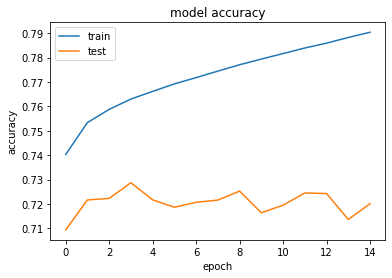

In [0]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
# save as JSON
import json
json_string = model.to_json()
model.save_weights(f"{WORK_DIR}/models/w2v_lstm.h5")
with open(f"{WORK_DIR}/models/w2v_lstm.json", 'w') as f:
    json.dump(json_string, f)

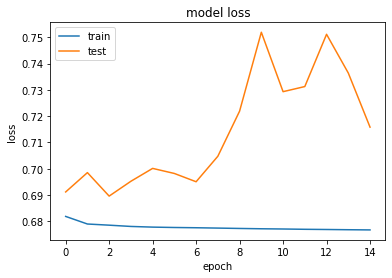

In [0]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Embedding,Conv1D,MaxPooling1D,Bidirectional,Dropout

new_model = Sequential()
new_model.add(Conv1D(32, kernel_size=3,activation='relu',padding='same',input_shape=(max_tokens_len,vector_size)))
new_model.add(MaxPooling1D(pool_size=3))
new_model.add(Bidirectional(LSTM(128)))
new_model.add(Dropout(0.2))
new_model.add(Dense(128,activation='relu'))
new_model.add(Dropout(0.1))
new_model.add(Dense(1,activation='sigmoid'))
new_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 15, 32)            9632      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 5, 32)             0         
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               164864    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [0]:
history = new_model.fit(x_train,
          y_train,
          batch_size=256,
          shuffle=True,
          epochs=epochs,
          validation_data=(x_test,y_test))

Train on 1262839 samples, validate on 315709 samples
Epoch 1/15
1262839/1262839 [==============================] - 45s 35us/sample - loss: 0.5191 - acc: 0.7401 - val_loss: 0.5563 - val_acc: 0.7406
Epoch 2/15
1262839/1262839 [==============================] - 37s 29us/sample - loss: 0.5041 - acc: 0.7507 - val_loss: 0.5760 - val_acc: 0.7324
Epoch 3/15
1262839/1262839 [==============================] - 37s 29us/sample - loss: 0.4992 - acc: 0.7541 - val_loss: 0.5649 - val_acc: 0.7364
Epoch 4/15
1262839/1262839 [==============================] - 36s 29us/sample - loss: 0.4961 - acc: 0.7561 - val_loss: 0.5430 - val_acc: 0.7432
Epoch 5/15
1262839/1262839 [==============================] - 38s 30us/sample - loss: 0.4938 - acc: 0.7575 - val_loss: 0.5463 - val_acc: 0.7427
Epoch 6/15
1262839/1262839 [==============================] - 38s 30us/sample - loss: 0.4921 - acc: 0.7585 - val_loss: 0.5423 - val_acc: 0.7463
Epoch 7/15
1262839/1262839 [==============================] - 38s 30us/sample - los

NameError: ignored

In [0]:
# save as JSON
import json
json_string = new_model.to_json()
new_model.save_weights(f"{WORK_DIR}/models/w2v_bi_lstm.h5")
with open(f"{WORK_DIR}/models/w2v_bi_lstm.json", 'w') as f:
    json.dump(json_string, f)

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


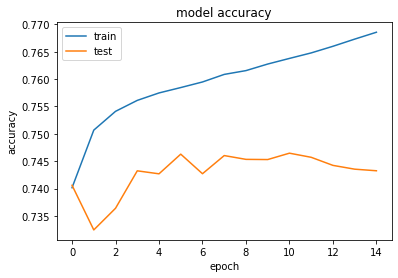

In [0]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

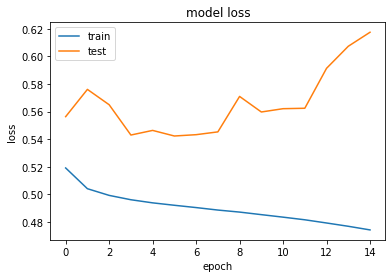

In [0]:
import matplotlib.pyplot as plt
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Embedding,Conv1D,MaxPooling1D,Bidirectional,Dropout,Flatten

dense_model = Sequential()
dense_model.add(Flatten(input_shape=(max_tokens_len,vector_size)))
dense_model.add(Dense(128,activation='relu',input_shape=(max_tokens_len,vector_size)))
dense_model.add(Dropout(0.2))
dense_model.add(Dense(256,activation='relu'))
dense_model.add(Dropout(0.2))
dense_model.add(Dense(128,activation='relu'))
dense_model.add(Dropout(0.1))
dense_model.add(Dense(1,activation='sigmoid'))
dense_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
dense_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1500)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               192128    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)              

In [0]:
history = dense_model.fit(x_train,
          y_train,
          batch_size=256,
          shuffle=True,
          epochs=epochs,
          validation_data=(x_test,y_test))

Train on 1262839 samples, validate on 315709 samples
Epoch 1/15
1262839/1262839 [==============================] - 20s 16us/sample - loss: 0.5362 - acc: 0.7266 - val_loss: 0.7323 - val_acc: 0.6873
Epoch 2/15
1262839/1262839 [==============================] - 20s 16us/sample - loss: 0.5203 - acc: 0.7391 - val_loss: 0.7512 - val_acc: 0.6907
Epoch 3/15
1262839/1262839 [==============================] - 20s 16us/sample - loss: 0.5126 - acc: 0.7447 - val_loss: 0.7486 - val_acc: 0.6877
Epoch 4/15
1262839/1262839 [==============================] - 20s 15us/sample - loss: 0.5061 - acc: 0.7494 - val_loss: 0.7720 - val_acc: 0.6853
Epoch 5/15
1262839/1262839 [==============================] - 20s 15us/sample - loss: 0.5004 - acc: 0.7537 - val_loss: 0.8354 - val_acc: 0.6910
Epoch 6/15
1262839/1262839 [==============================] - 19s 15us/sample - loss: 0.4955 - acc: 0.7571 - val_loss: 0.8130 - val_acc: 0.6890
Epoch 7/15
1262839/1262839 [==============================] - 19s 15us/sample - los

In [0]:
# save as JSON
import json
json_string = dense_model.to_json()
dense_model.save_weights(f"{WORK_DIR}/models/w2v_dnn.h5")
with open(f"{WORK_DIR}/models/w2v_dnn.json", 'w') as f:
    json.dump(json_string, f)

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


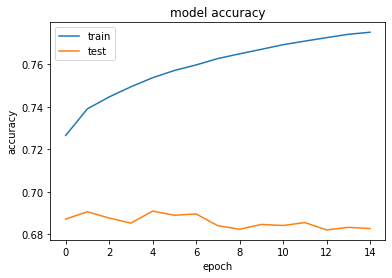

In [0]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

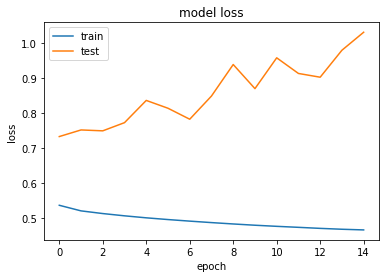

In [0]:
import matplotlib.pyplot as plt
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()